In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train.shape

(1460, 81)

In [8]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [10]:
test.shape

(1459, 80)

In [11]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

C:\Users\hcy02\my-env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice'>

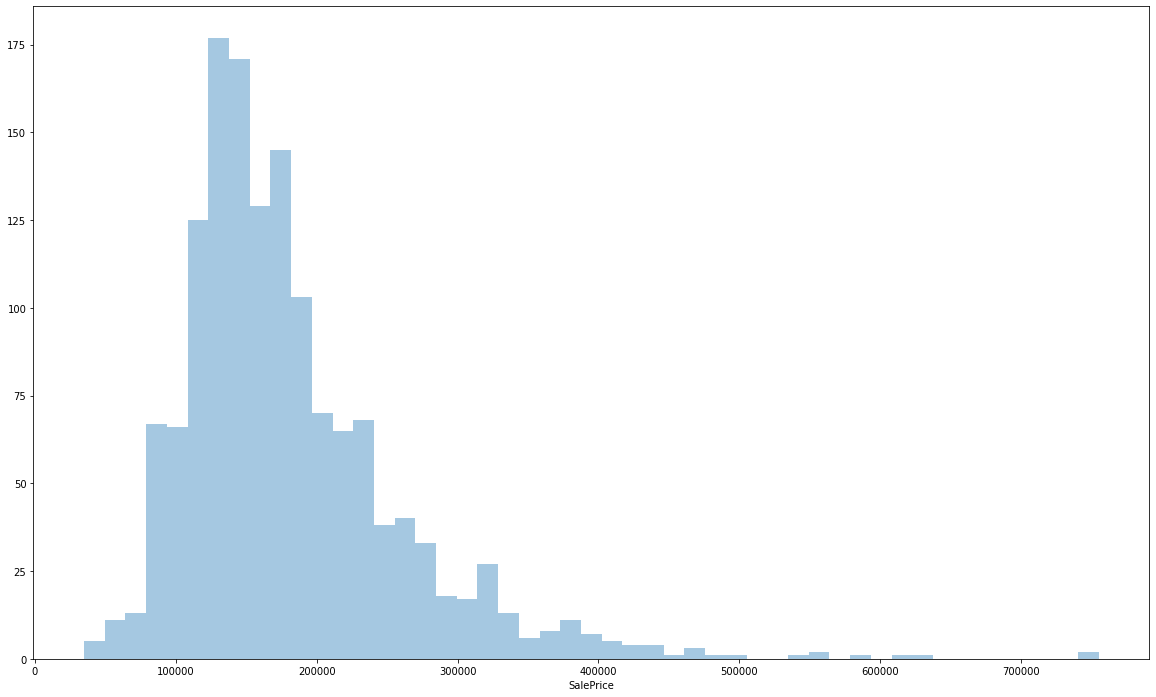

In [12]:
plt.figure(figsize=(20,12))
sns.distplot(train.get("SalePrice"), kde=False)

<AxesSubplot:>

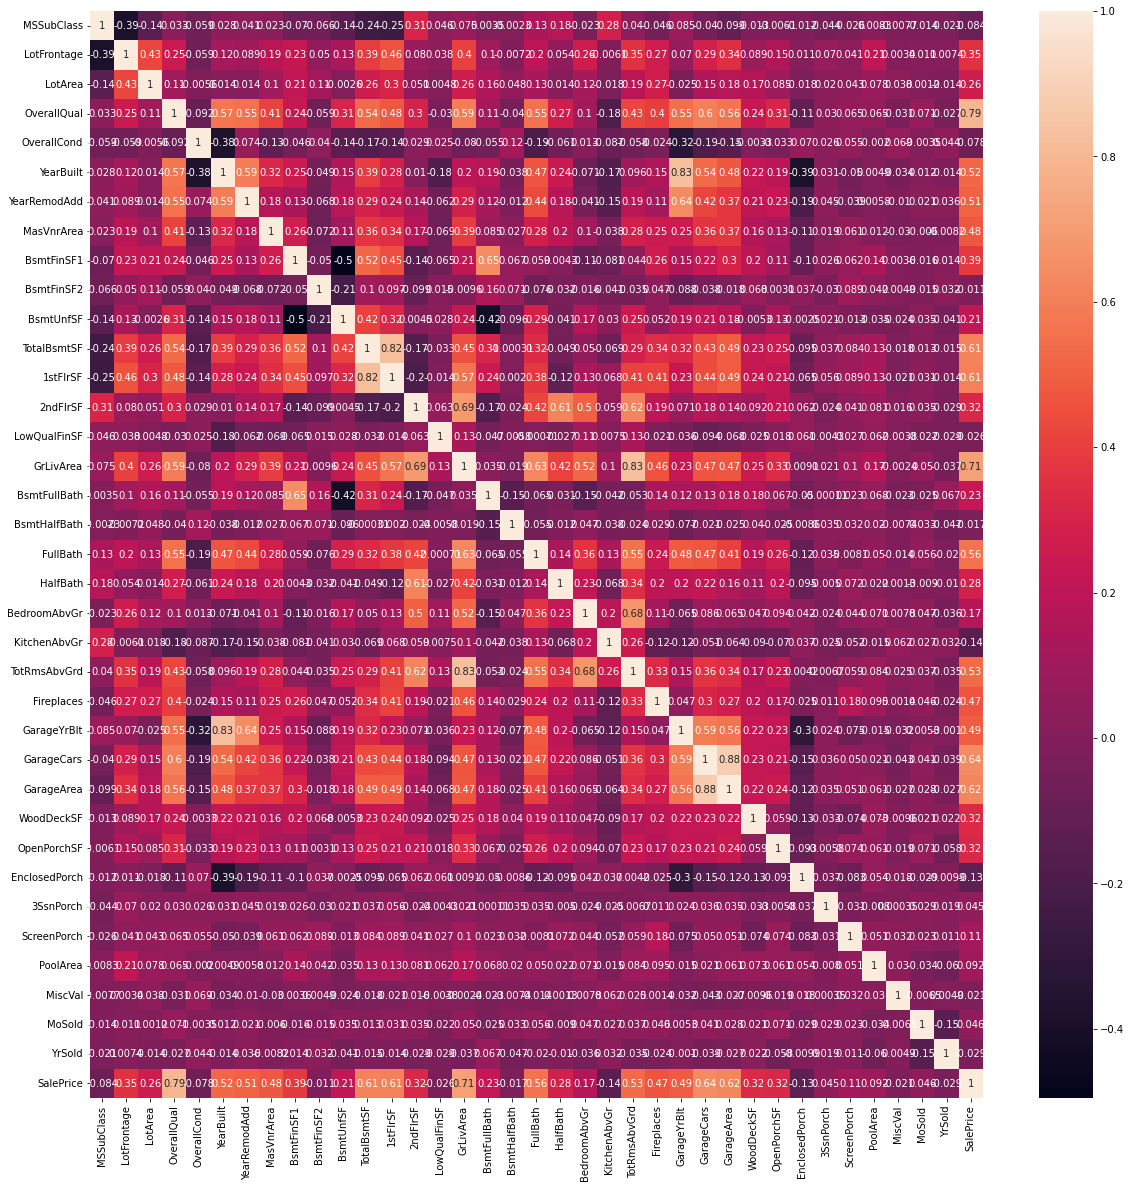

In [13]:
plt.figure(figsize=(20,20))
train_corr = x = train.drop(['Id'], axis=1)
corr = train_corr.corr() # allows us to get the correlations
sns.heatmap(corr, annot=True) # annot=True adds the values

C:\Users\hcy02\AppData\Local\Temp\ipykernel_22376\3387913604.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))


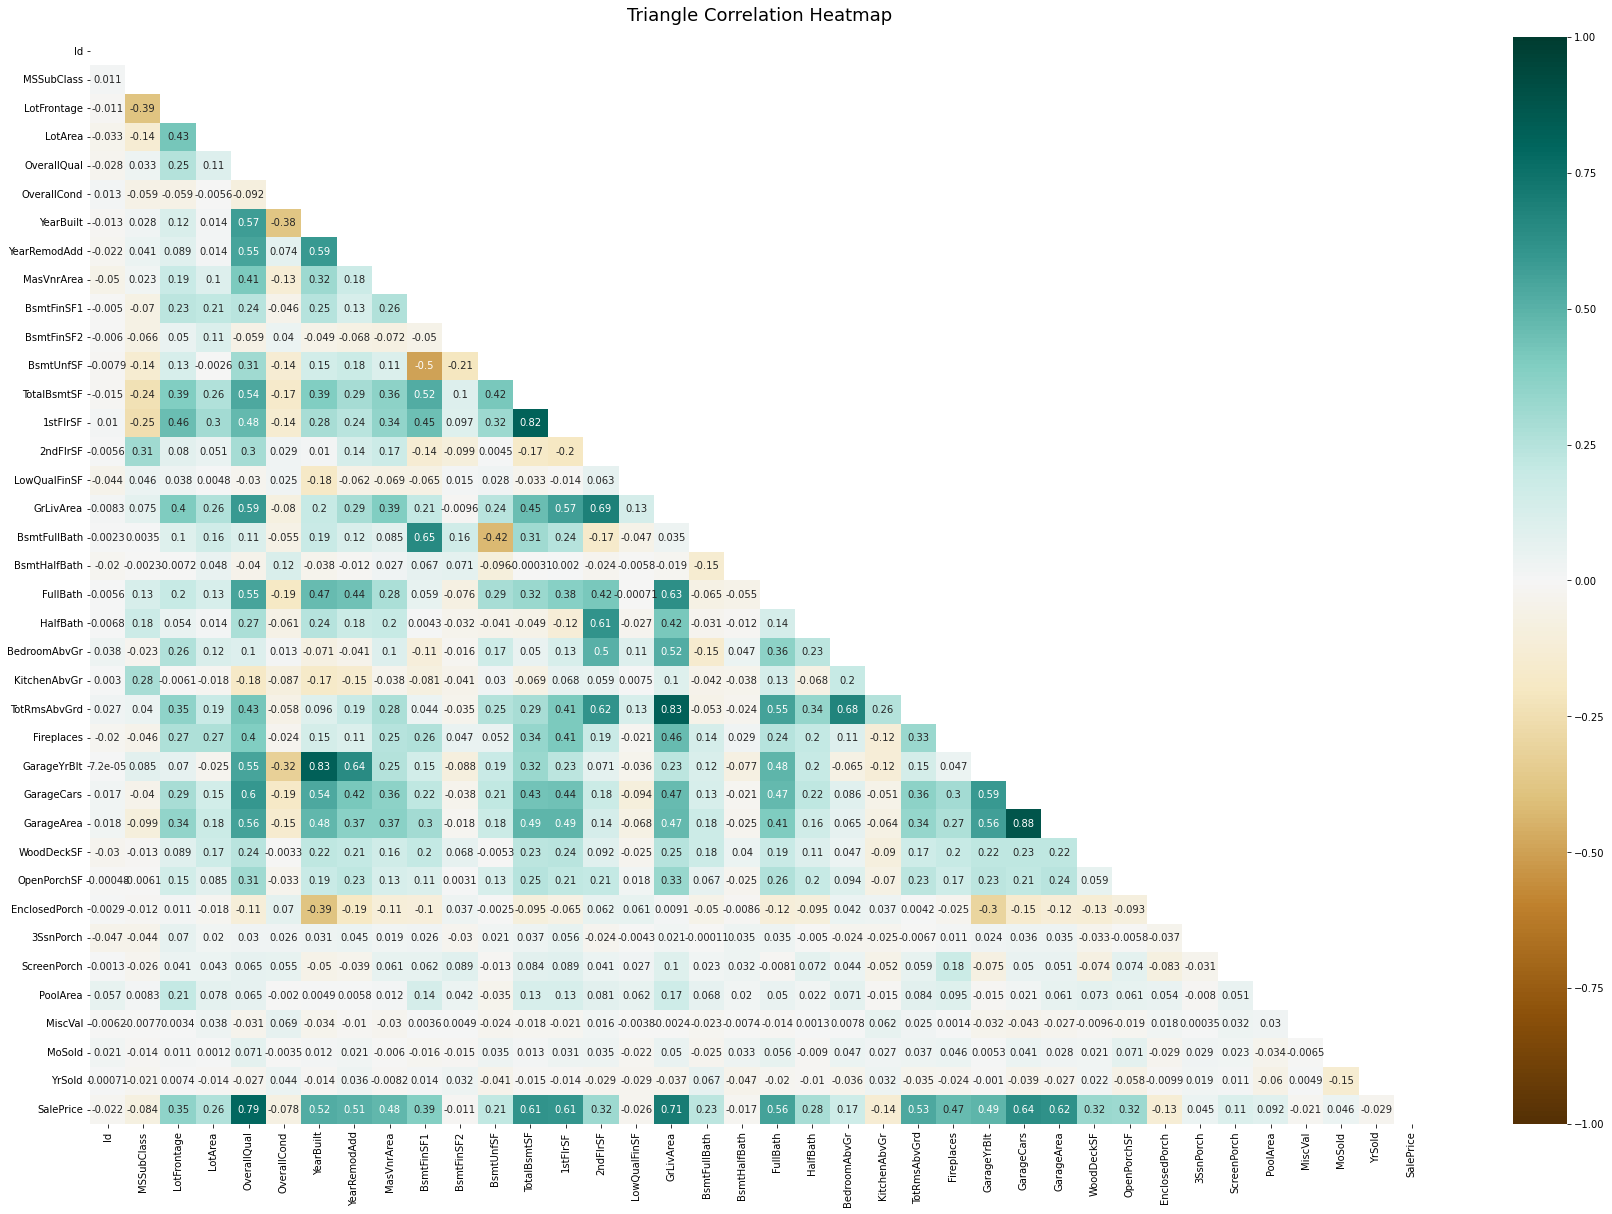

In [14]:
plt.figure(figsize=(30, 20))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
heatmap = sns.heatmap(train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

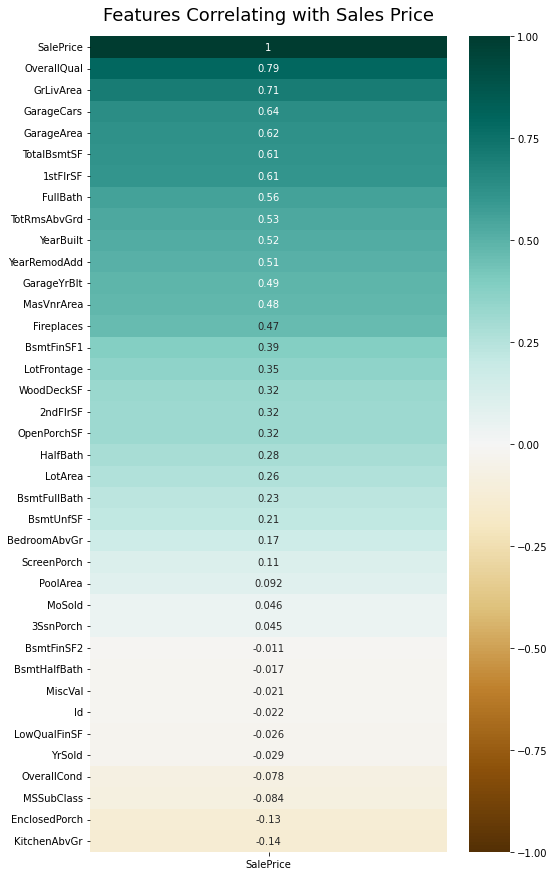

In [15]:
train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
plt.figure(figsize=(8, 15))
heatmap = sns.heatmap(train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

<Figure size 1440x1440 with 0 Axes>

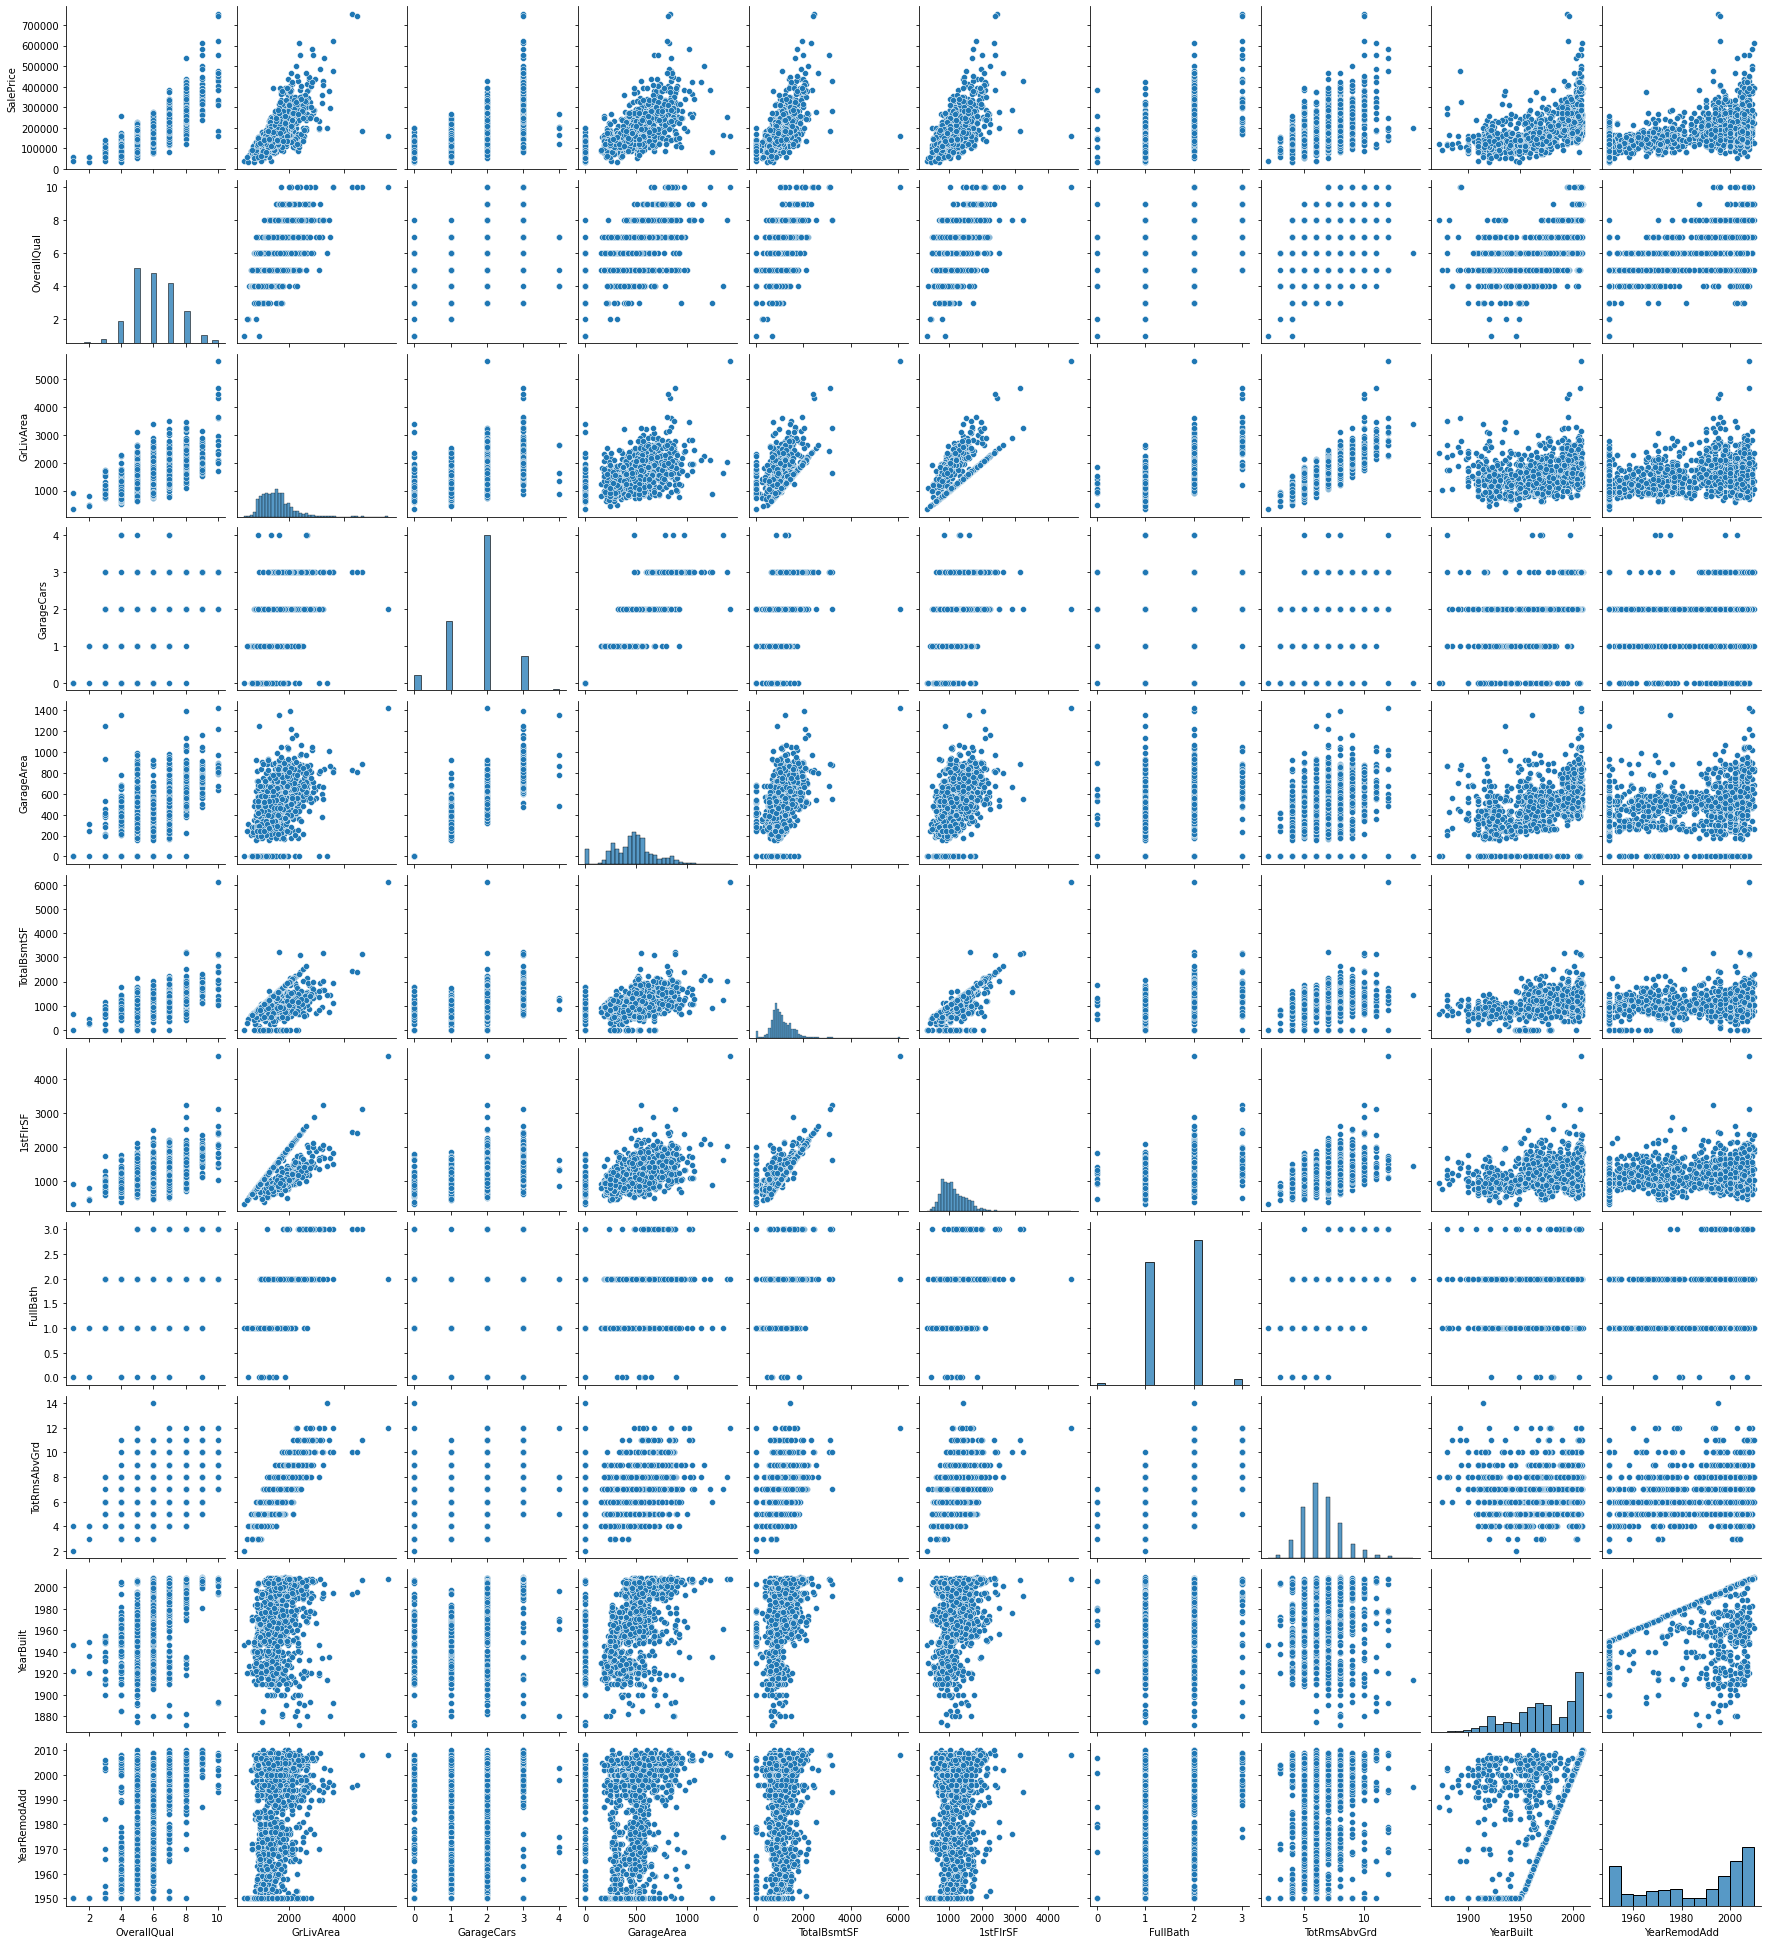

In [16]:
plt.figure(figsize=(20,20))
sns.pairplot(
    train,
    x_vars=["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"],
    y_vars=["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]
)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

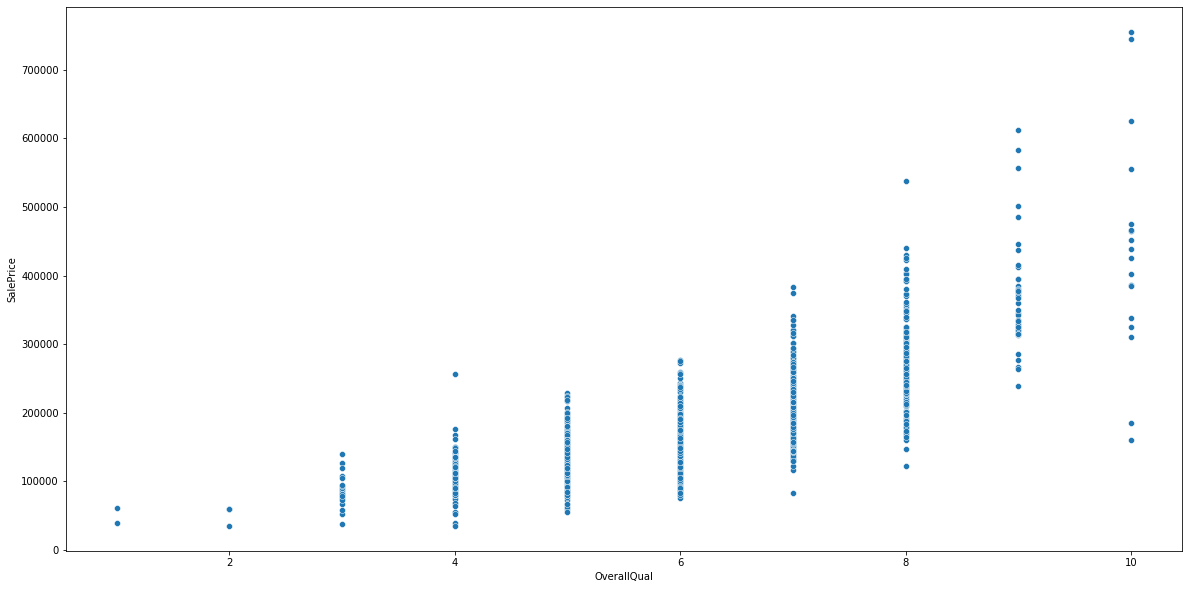

In [17]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=train, x="OverallQual", y="SalePrice")

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

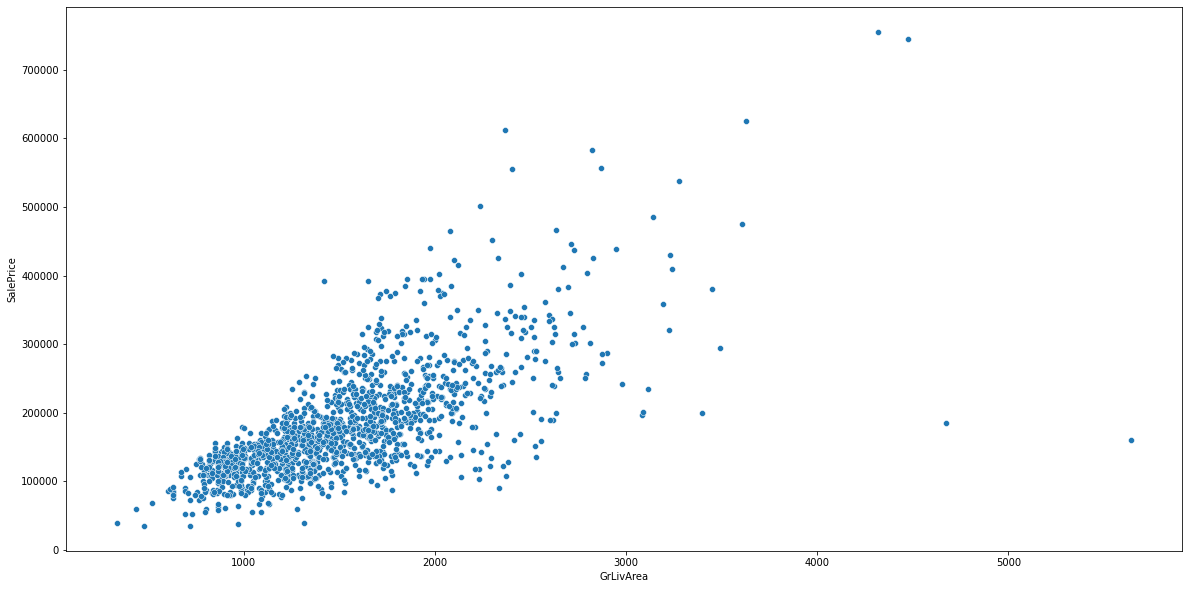

In [18]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=train, x="GrLivArea", y="SalePrice")

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

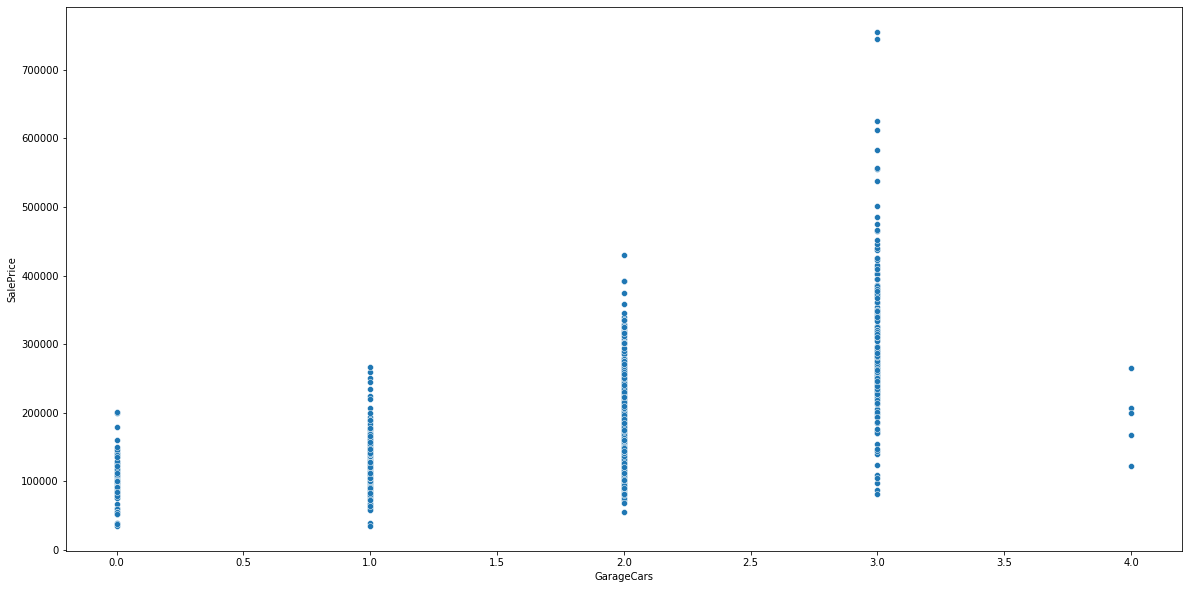

In [19]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=train, x="GarageCars", y="SalePrice")

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

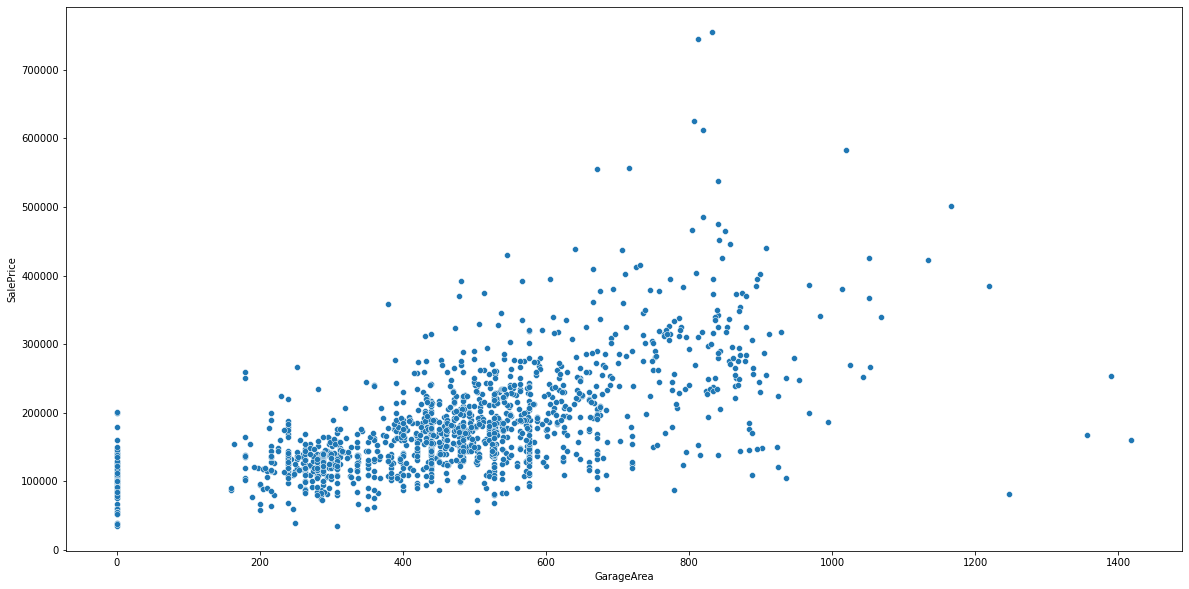

In [20]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=train, x="GarageArea", y="SalePrice")

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

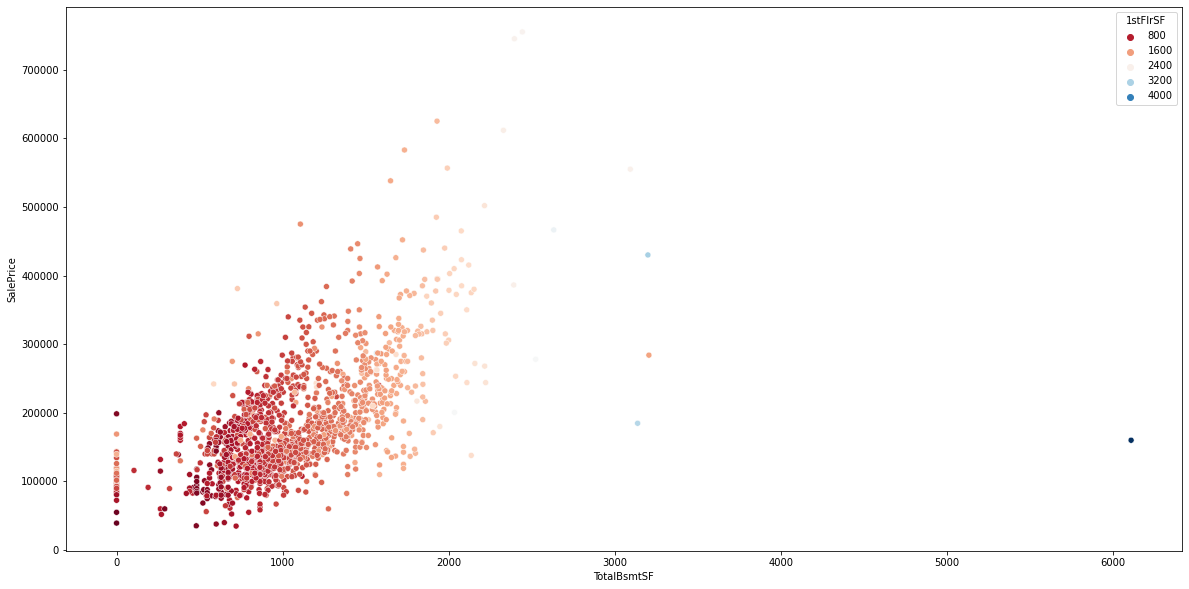

In [21]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=train, x="TotalBsmtSF", y="SalePrice", hue="1stFlrSF", palette='RdBu')

In [22]:
# missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [23]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','GarageCond', 'GarageType', 'GarageFinish', 'GarageQual'):
    train[col] = train[col].fillna('None')

In [24]:
train["GarageYrBlt"] = train["GarageYrBlt"].fillna(0)

In [25]:
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1','Electrical'):
    train[col] = train[col].fillna('None')

In [26]:
# I fill in missing values by the median LotFrontage of the neighborhood.
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [27]:
# MasVnrArea and MasVnrType :  most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

In [28]:
# Double check if there's any null value left
train.isnull().sum().sort_values(ascending=False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

In [29]:
# Linear Regression

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [31]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for col in train.columns:
    train[col] = enc.fit(train[col]).transform(train[col])

train.dtypes

Id               int64
MSSubClass       int64
MSZoning         int32
LotFrontage      int64
LotArea          int64
                 ...  
MoSold           int64
YrSold           int64
SaleType         int32
SaleCondition    int32
SalePrice        int64
Length: 81, dtype: object

In [32]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,5,3,37,327,1,1,3,3,0,...,0,3,4,1,0,1,2,8,4,412
1,1,0,3,55,498,1,1,3,3,0,...,0,3,4,1,0,4,1,8,4,339
2,2,5,3,42,702,1,1,0,3,0,...,0,3,4,1,0,8,2,8,4,442
3,3,6,3,31,489,1,1,0,3,0,...,0,3,4,1,0,1,0,8,0,194
4,4,5,3,59,925,1,1,0,3,0,...,0,3,4,1,0,11,2,8,4,494


In [33]:
# separate data into independent and dependent variables for the training dataset
X = train.drop(['Id','SalePrice'], axis = 1)
y = train['SalePrice']
len(X) == len(y)

True

In [34]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
# fit data to the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
lr.score(X, y)

0.9154566880908901

In [36]:
lr.score(X_test, y_test)

0.9040484348931958

In [37]:
# display the feature names with the coefficients
features = X.columns
list(zip(features, lr.coef_))

[('MSSubClass', 0.20799882428820726),
 ('MSZoning', -11.630954803893053),
 ('LotFrontage', -0.11628754775961192),
 ('LotArea', 0.03721868848096921),
 ('Street', 53.9214129920072),
 ('Alley', 11.198628818012494),
 ('LotShape', -2.182369946158403),
 ('LandContour', 4.430615651381972),
 ('Utilities', -63.29003190280312),
 ('LotConfig', -0.07788370936811928),
 ('LandSlope', 21.971743322394182),
 ('Neighborhood', -0.11738282211358442),
 ('Condition1', -0.03656701337926638),
 ('Condition2', -13.656885669373843),
 ('BldgType', -6.724521557266344),
 ('HouseStyle', -0.5400434499938909),
 ('OverallQual', 21.29034096914125),
 ('OverallCond', 15.35258823273972),
 ('YearBuilt', 1.0531501738575781),
 ('YearRemodAdd', 0.4090805851181808),
 ('RoofStyle', -1.204313202669844),
 ('RoofMatl', 3.5156296566939784),
 ('Exterior1st', -2.477053166490707),
 ('Exterior2nd', 2.2100281254153114),
 ('MasVnrType', 1.4699693105698906),
 ('MasVnrArea', -0.013050851080716797),
 ('ExterQual', -1.5435009116313179),
 ('Ex

In [38]:
# get predictions
y_pred = lr.predict(X_test)
y_pred = y_pred.reshape(-1,1)
# calculate MAE, MSE and RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 35.63236112457892
Mean Squared Error: 2592.336924647188
Root Mean Squared Error: 50.914997050448584


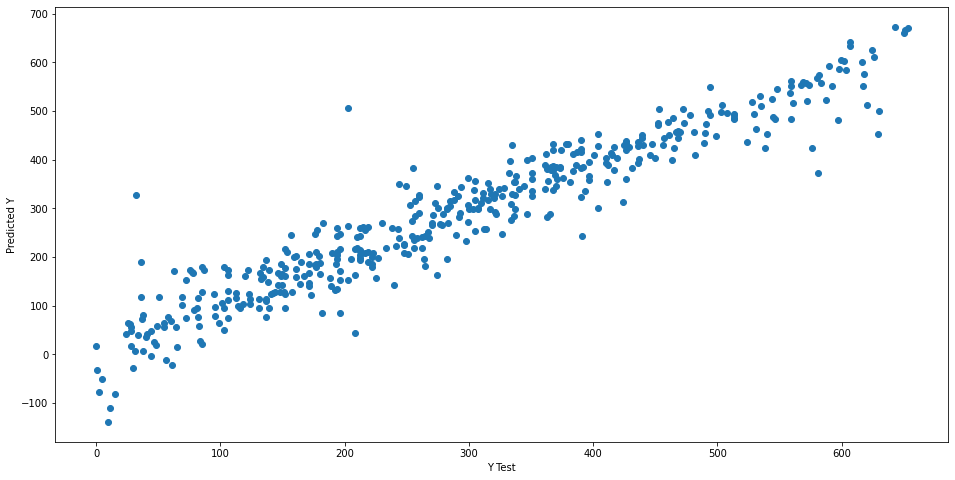

In [39]:
plt.figure(figsize=(16,8))
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [40]:
# missing data on test dataset
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageYrBlt,78,5.346127
GarageQual,78,5.346127
GarageFinish,78,5.346127
GarageCond,78,5.346127


In [41]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','GarageCond', 'GarageType', 'GarageFinish', 'GarageQual'):
    test[col] = test[col].fillna('None')

In [42]:
test["GarageYrBlt"] = test["GarageYrBlt"].fillna(0)

In [43]:
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1','Electrical'):
    test[col] = test[col].fillna('None')

In [44]:
# I fill in missing values by the median LotFrontage of the neighborhood.
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [45]:
# MasVnrArea and MasVnrType :  most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
test["MasVnrType"] = test["MasVnrType"].fillna("None")
test["MasVnrArea"] = test["MasVnrArea"].fillna(0)

In [46]:
# Double check if there's any null value left
test.isnull().sum().sort_values(ascending=False)

MSZoning         4
BsmtFullBath     2
BsmtHalfBath     2
Functional       2
Utilities        2
                ..
ExterQual        0
MasVnrArea       0
MasVnrType       0
RoofMatl         0
SaleCondition    0
Length: 80, dtype: int64

In [47]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
MSZoning,4,0.27416
BsmtFullBath,2,0.13708
BsmtHalfBath,2,0.13708
Functional,2,0.13708
Utilities,2,0.13708
Exterior2nd,1,0.06854
BsmtFinSF2,1,0.06854
GarageArea,1,0.06854
BsmtFinSF1,1,0.06854
GarageCars,1,0.06854


In [48]:
test["MSZoning"] = test["MSZoning"].fillna("None")
test["Functional"] = test["Functional"].fillna("None")
test["Utilities"] = test["Utilities"].fillna("None")

In [49]:
test["BsmtFullBath"] = test["BsmtFullBath"].fillna(0)
test["BsmtHalfBath"] = test["BsmtHalfBath"].fillna(0)
test["SaleType"] = test["SaleType"].fillna(0)

In [50]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Exterior2nd,1,0.06854
KitchenQual,1,0.06854
GarageCars,1,0.06854
GarageArea,1,0.06854
TotalBsmtSF,1,0.06854
BsmtUnfSF,1,0.06854
BsmtFinSF2,1,0.06854
BsmtFinSF1,1,0.06854
Exterior1st,1,0.06854
FireplaceQu,0,0.00000


In [87]:
for col in ('Exterior2nd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF','BsmtFinSF2', 'BsmtFinSF1','Exterior1st'):
    test[col] = test[col].fillna(0)
test["KitchenQual"] = test["KitchenQual"].fillna("None")


Id                int64
MSSubClass        int64
MSZoning          int64
LotFrontage       int64
LotArea           int64
                  ...  
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Length: 80, dtype: object

In [85]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for col in test.columns:
    test[col] = enc.fit(test[col]).transform(test[col])

test.dtypes

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [86]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,0,3,59,777,1,1,3,3,0,...,18,0,2,2,1,0,5,4,WD,Normal
1,1,0,4,60,964,1,1,0,3,0,...,0,0,2,4,0,24,5,4,WD,Normal
2,2,5,4,53,947,1,1,0,3,0,...,0,0,2,2,1,0,2,4,WD,Normal
3,3,5,4,57,587,1,1,0,3,0,...,0,0,2,4,1,0,5,4,WD,Normal
4,4,11,4,19,118,1,1,0,1,0,...,27,0,2,4,1,0,0,4,WD,Normal


In [69]:
# Support Vector Machine Regression 
from sklearn.svm import SVR
# separate data into independent and dependent variables for the training dataset
X = train.drop(['Id','SalePrice'], axis = 1)
y = train['SalePrice']
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

In [70]:
svr.score(X, y)

0.49171719791742985

In [71]:
svr.score(X_test, y_test)

0.48926109532738493

In [72]:
# display the feature names with the coefficients
features = X.columns
list(zip(features, lr.coef_))

[('MSSubClass', 0.20799882428820726),
 ('MSZoning', -11.630954803893053),
 ('LotFrontage', -0.11628754775961192),
 ('LotArea', 0.03721868848096921),
 ('Street', 53.9214129920072),
 ('Alley', 11.198628818012494),
 ('LotShape', -2.182369946158403),
 ('LandContour', 4.430615651381972),
 ('Utilities', -63.29003190280312),
 ('LotConfig', -0.07788370936811928),
 ('LandSlope', 21.971743322394182),
 ('Neighborhood', -0.11738282211358442),
 ('Condition1', -0.03656701337926638),
 ('Condition2', -13.656885669373843),
 ('BldgType', -6.724521557266344),
 ('HouseStyle', -0.5400434499938909),
 ('OverallQual', 21.29034096914125),
 ('OverallCond', 15.35258823273972),
 ('YearBuilt', 1.0531501738575781),
 ('YearRemodAdd', 0.4090805851181808),
 ('RoofStyle', -1.204313202669844),
 ('RoofMatl', 3.5156296566939784),
 ('Exterior1st', -2.477053166490707),
 ('Exterior2nd', 2.2100281254153114),
 ('MasVnrType', 1.4699693105698906),
 ('MasVnrArea', -0.013050851080716797),
 ('ExterQual', -1.5435009116313179),
 ('Ex

In [73]:
# get predictions
svr_pred = svr.predict(X_test)
# calculate MAE, MSE and RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, svr_pred))
print('Mean Squared Error:', mean_squared_error(y_test, svr_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, svr_pred)))

Mean Absolute Error: 97.41840026668787
Mean Squared Error: 13798.704794058549
Root Mean Squared Error: 117.46788835276877


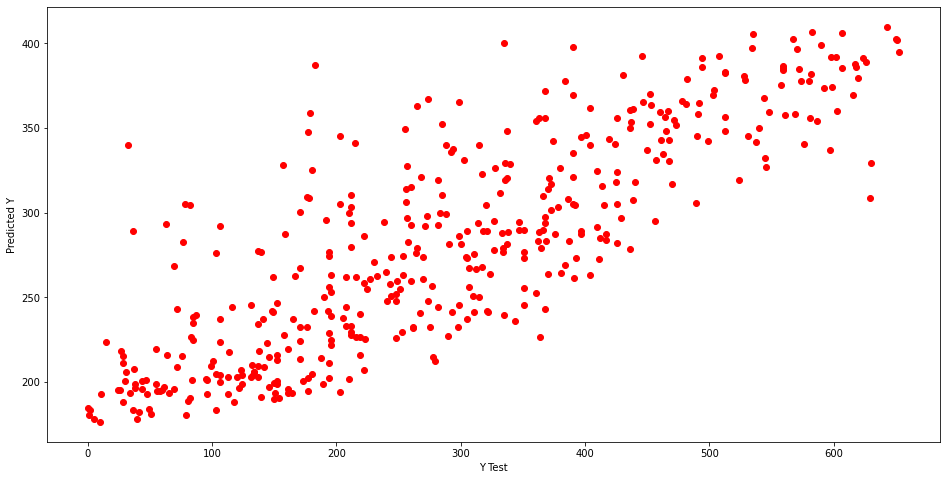

In [74]:
plt.figure(figsize=(16,8))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [75]:
# Random Forest Regression 
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [88]:
rfr.score(X, y)

0.9570639195492463

In [76]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [77]:
print('Mean Absolute Error:', mean_absolute_error(y_test, rfr_pred))
print('Mean Squared Error:', mean_squared_error(y_test, rfr_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rfr_pred)))

Mean Absolute Error: 39.91525114155252
Mean Squared Error: 3081.835758447489
Root Mean Squared Error: 55.514284273937


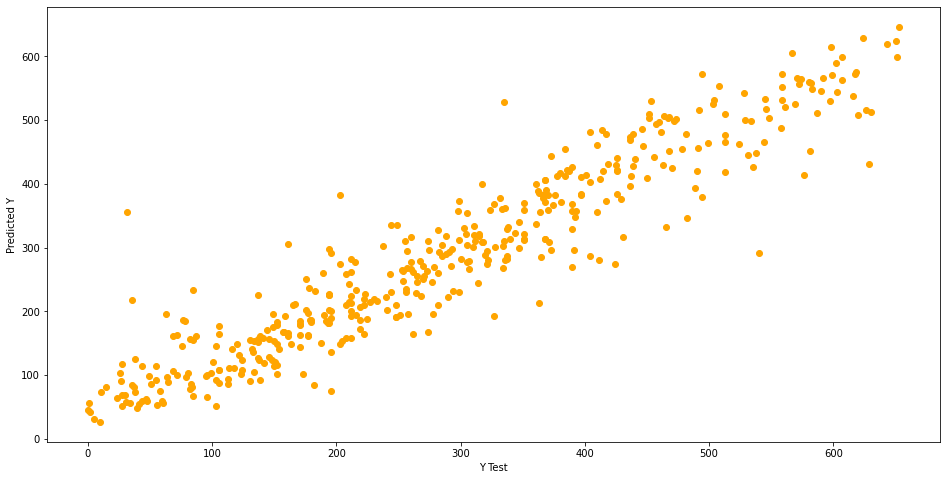

In [78]:
plt.figure(figsize=(16,8))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [79]:
test_id = test['Id']
a = pd.DataFrame(test_id, columns=['Id'])

In [80]:
test.shape

(1459, 80)

In [81]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,0,3,59,777,1,1,3,3,0,...,18,0,2,2,1,0,5,4,WD,Normal
1,1,0,4,60,964,1,1,0,3,0,...,0,0,2,4,0,24,5,4,WD,Normal
2,2,5,4,53,947,1,1,0,3,0,...,0,0,2,2,1,0,2,4,WD,Normal
3,3,5,4,57,587,1,1,0,3,0,...,0,0,2,4,1,0,5,4,WD,Normal
4,4,11,4,19,118,1,1,0,1,0,...,27,0,2,4,1,0,0,4,WD,Normal


In [82]:

test_pred=rfr.predict(test)
test_pred

C:\Users\hcy02\my-env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Id
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'WD'